In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from RandomForestForTimeSeriesClassifier import RandomForestForTimeSeriesClassifier, BLOCK_TYPES
from pyts.classification import TimeSeriesForest

In [2]:
dataset = pd.read_csv('../datasets/sp_500_stocks/sp500_stocks.csv') #, nrows=1000000)

In [3]:
dataset = dataset.dropna()
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
22525,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
22526,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
22527,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
22528,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1880749,2024-11-25,ZBRA,400.940002,400.940002,404.320007,398.130005,400.029999,420200.0
1880750,2024-11-26,ZBRA,402.450012,402.450012,403.570007,399.690002,402.440002,369200.0
1880751,2024-11-27,ZBRA,405.750000,405.750000,406.140015,400.929993,403.730011,258300.0
1880752,2024-11-29,ZBRA,407.000000,407.000000,409.029999,405.510010,406.640015,175700.0


In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].map(dt.datetime.toordinal)
#dataset['Date'] = pd.to_float(dataset['Date'])
# dataset['Date'] = datetime.datetime.strptime(dataset['Date'], '%Y-%m-%d')
# dataset['Date'] = float(time.mktime(dataset['Date']))
# dataset['Symbol'] = pd.factorize(dataset.Symbol)[0]
# dataset['Adj Close'] = dataset['Adj Close'] * 100
# dataset['Adj Close'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Close'] = dataset['Close'] * 100
# dataset['Close'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['High'] = dataset['High'] * 100
# dataset['High'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Low'] = dataset['Low'] * 100
# dataset['Low'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Open'] = dataset['Open'] * 100
# dataset['Open'] = np.floor(pd.to_numeric(dataset['Adj Close'], errors='coerce')).astype('Int64')
# dataset['Volume'] = np.floor(pd.to_numeric(dataset['Volume'], errors='coerce')).astype('Int64')
#dataset = dataset.drop('Volume', axis=1)
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,733776,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
22525,733777,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
22526,733778,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
22527,733779,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
22528,733780,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1880749,739215,ZBRA,400.940002,400.940002,404.320007,398.130005,400.029999,420200.0
1880750,739216,ZBRA,402.450012,402.450012,403.570007,399.690002,402.440002,369200.0
1880751,739217,ZBRA,405.750000,405.750000,406.140015,400.929993,403.730011,258300.0
1880752,739219,ZBRA,407.000000,407.000000,409.029999,405.510010,406.640015,175700.0


In [5]:
dataset = dataset.sort_values("Date")
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1704316,733776,TFC,15.461010,25.809999,25.870001,25.400000,25.690001,4550800.0
1054874,733776,KR,7.725854,10.240000,10.325000,10.220000,10.265000,12718800.0
1302638,733776,NUE,31.741510,47.790001,48.279999,47.320000,47.380001,4923600.0
585624,733776,DHI,9.494744,11.160000,11.180000,10.870000,10.960000,5799100.0
1002318,733776,JCI,12.019052,18.879391,19.025137,18.665976,18.728437,8334301.0
...,...,...,...,...,...,...,...,...
135143,739222,ADI,223.119995,223.119995,224.789993,217.009995,218.130005,3225146.0
1058627,739222,KR,60.150002,60.150002,60.759998,59.590000,60.500000,3030489.0
1321407,739222,ORLY,1246.819946,1246.819946,1254.994995,1240.359985,1243.219971,424366.0
292811,739222,BG,89.089996,89.089996,89.379997,87.870003,88.980003,1163730.0


In [6]:
from sklearn import preprocessing

Y = dataset.pop("Symbol")
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset)
normalized_dataset = pd.DataFrame(x_scaled)

normalized_dataset

,0,1,2,3,4,5,6
0,0.0,0.002763,0.004744,0.004729,0.004707,0.004731,0.004979
1,0.0,0.001282,0.001763,0.001760,0.001779,0.001772,0.013914
2,0.0,0.005880,0.008952,0.009009,0.008935,0.008893,0.005386
3,0.0,0.001621,0.001939,0.001924,0.001904,0.001905,0.006344
4,0.0,0.002104,0.003417,0.003422,0.003408,0.003396,0.009118
...,...,...,...,...,...,...,...
581583,1.0,0.042520,0.042520,0.042721,0.041669,0.041654,0.003528
581584,1.0,0.011319,0.011319,0.011393,0.011302,0.011410,0.003315
581585,1.0,0.238509,0.238509,0.239479,0.239072,0.238334,0.000464
581586,1.0,0.016859,0.016859,0.016859,0.016757,0.016875,0.001273


In [7]:
trainPercent = 80
trainSamples = (len(dataset.index) // 100) * trainPercent
testSamples = len(dataset.index) - trainSamples

In [8]:
aux = normalized_dataset.copy()

#Y = aux.pop("Symbol")

X = aux.copy()
#dataset = aux

X_train = X.iloc[:trainSamples]
Y_train = Y.iloc[:trainSamples]
X_test = X.iloc[-testSamples:]
Y_test = Y.iloc[-testSamples:]

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
#
#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)
X_train

,0,1,2,3,4,5,6
0,0.000000,0.002763,0.004744,0.004729,0.004707,0.004731,0.004979
1,0.000000,0.001282,0.001763,0.001760,0.001779,0.001772,0.013914
2,0.000000,0.005880,0.008952,0.009009,0.008935,0.008893,0.005386
3,0.000000,0.001621,0.001939,0.001924,0.001904,0.001905,0.006344
4,0.000000,0.002104,0.003417,0.003422,0.003408,0.003396,0.009118
...,...,...,...,...,...,...,...
465195,0.812707,0.006633,0.007287,0.007306,0.007288,0.007306,0.001131
465196,0.812707,0.084845,0.087905,0.087790,0.087517,0.087965,0.000509
465197,0.812707,0.002369,0.002722,0.002751,0.002743,0.002740,0.008745
465198,0.812707,0.027329,0.031329,0.031487,0.031318,0.031581,0.002243


In [9]:
basicRF = RandomForestClassifier(n_jobs=10, n_estimators=100, max_depth=10)

In [10]:
basicRF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_jobs=10)

In [11]:
# Realizar predicciones sobre los datos de prueba
y_pred = basicRF.predict(X_test)

In [12]:
from sklearn import metrics

print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.11599133931333128


In [13]:
rf_precision = metrics.accuracy_score(Y_test, y_pred)

In [14]:
count_row = dataset.shape[0]
#block_size = int(math.sqrt(count_row))
block_size = int(count_row // 100)

In [15]:
rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=block_size, max_depth=10)

In [16]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [17]:
rfts.fit(X_train, Y_train)

RandomForestForTimeSeriesClassifier(block_size=5815, max_depth=10, n_jobs=10)

In [18]:
y_pred = rfts.predict(X_test)

In [19]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.1100800769838815


In [20]:
precision = dict()
for i in range(10, 100):
    block_size = i #int(count_row // i)
    rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=block_size, max_depth=10)
    rfts.fit(X_train, Y_train)
    y_pred = rfts.predict(X_test)
    print(f"Precisión: ({i}, {block_size})")
    print(metrics.accuracy_score(Y_test, y_pred))
    precision[i] = (block_size, metrics.accuracy_score(Y_test, y_pred))

Precisión: (10, 10)
0.11429872495446267
Precisión: (11, 11)
0.11375743203766711
Precisión: (12, 12)
0.11117984671959308
Precisión: (13, 13)
0.1118242430491116
Precisión: (14, 14)
0.11454789153520982
Precisión: (15, 15)
0.1116609959789669
Precisión: (16, 16)
0.10921228992679657
Precisión: (17, 17)
0.10607622778980651
Precisión: (18, 18)
0.1135168574079802
Precisión: (19, 19)
0.11056122624325532
Precisión: (20, 20)
0.11081039282400247
Precisión: (21, 21)
0.11078461697082173
Precisión: (22, 22)
0.11201326597243702
Precisión: (23, 23)
0.11013162869024298
Precisión: (24, 24)
0.10873114066742276
Precisión: (25, 25)
0.1141612537374987
Precisión: (26, 26)
0.10726191703612056
Precisión: (27, 27)
0.11068151355809877
Precisión: (28, 28)
0.11298415644224491
Precisión: (29, 29)
0.10879128432484449
Precisión: (30, 30)
0.10800941677836202
Precisión: (31, 31)
0.11600852321545177
Precisión: (32, 32)
0.11333642643571502
Precisión: (33, 33)
0.11538131078805375
Precisión: (34, 34)
0.11331065058253428
Prec

In [21]:
rfts_alter = TimeSeriesForest(n_jobs=10, n_estimators=100, max_depth=10)
rfts_alter.fit(X_train, Y_train)

TimeSeriesForest(max_depth=10, n_estimators=100, n_jobs=10)

In [22]:
y_pred = rfts_alter.predict(X_test)

In [23]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.12793415128707428


In [24]:
rfts_alter_precision = metrics.accuracy_score(Y_test, y_pred)

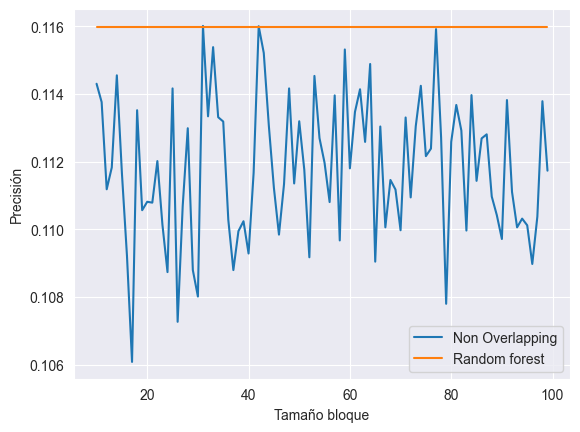

In [25]:
from matplotlib import pyplot as plt

plt_x = []
plt_y = []

for r in precision:
    plt_x.append(precision[r][0])
    plt_y.append(precision[r][1])

plt.plot(plt_x, plt_y, label ='Non Overlapping')

plt_x = []
plt_y = []

for r in precision:
    plt_x.append(precision[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.xlabel("Tamaño bloque")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [26]:
precision2 = dict()
for i in range(10, 100):
    block_size = i #int(count_row // i)
    rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=i, max_depth=10, block_type=BLOCK_TYPES[1])
    rfts.fit(X_train, Y_train)
    y_pred = rfts.predict(X_test)
    print(f"Precisión: ({i}, {block_size})")
    print(metrics.accuracy_score(Y_test, y_pred))
    precision2[i] = (block_size, metrics.accuracy_score(Y_test, y_pred))

Precisión: (10, 10)
0.11203044987455751
Precisión: (11, 11)
0.11303570814860639
Precisión: (12, 12)
0.11308725985496787
Precisión: (13, 13)
0.11177269134275011
Precisión: (14, 14)
0.11250300718287108
Precisión: (15, 15)
0.11034642746674915
Precisión: (16, 16)
0.11328487472935354
Precisión: (17, 17)
0.1135168574079802
Precisión: (18, 18)
0.10896312334604942
Precisión: (19, 19)
0.11326769082723305
Precisión: (20, 20)
0.11414406983537821
Precisión: (21, 21)
0.1115321167130632
Precisión: (22, 22)
0.10760559507853043
Precisión: (23, 23)
0.11207340962985875
Precisión: (24, 24)
0.11356840911434168
Precisión: (25, 25)
0.11290682888270269
Precisión: (26, 26)
0.110097260886002
Precisión: (27, 27)
0.10909200261195312
Precisión: (28, 28)
0.10937553699694126
Precisión: (29, 29)
0.10974499089253188
Precisión: (30, 30)
0.1127263979104375
Precisión: (31, 31)
0.11339657009313675
Precisión: (32, 32)
0.11409251812901673
Precisión: (33, 33)
0.1158109083410661
Precisión: (34, 34)
0.11261470254665429
Precis

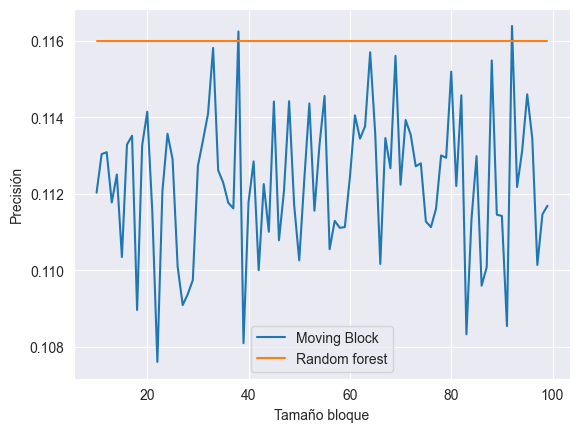

In [27]:
plt_x = []
plt_y = []

for r in precision2:
    plt_x.append(precision2[r][0])
    plt_y.append(precision2[r][1])

plt.plot(plt_x, plt_y, label ='Moving Block')

plt_x = []
plt_y = []
for r in precision:
    plt_x.append(precision2[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.xlabel("Tamaño bloque")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [28]:
precision3 = dict()
for i in range(10, 100):
    block_size = i #int(count_row // i)
    rfts = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, block_size=i, max_depth=10, block_type=BLOCK_TYPES[2])
    rfts.fit(X_train, Y_train)
    y_pred = rfts.predict(X_test)
    print(f"Precisión: ({i}, {block_size})")
    print(metrics.accuracy_score(Y_test, y_pred))
    precision3[i] = (block_size, metrics.accuracy_score(Y_test, y_pred))

Precisión: (10, 10)
0.11082757672612296
Precisión: (11, 11)
0.10972780699041139
Precisión: (12, 12)
0.11503763274564388
Precisión: (13, 13)
0.11096504794308691
Precisión: (14, 14)
0.110097260886002
Precisión: (15, 15)
0.11384335154826958
Precisión: (16, 16)
0.11223665670000343
Precisión: (17, 17)
0.10945286455648348
Precisión: (18, 18)
0.11374024813554662
Precisión: (19, 19)
0.11125717427913531
Precisión: (20, 20)
0.11252878303605182
Precisión: (21, 21)
0.11441901226930612
Precisión: (22, 22)
0.11230539230848541
Precisión: (23, 23)
0.11335361033783552
Precisión: (24, 24)
0.11268343815513626
Precisión: (25, 25)
0.11171254768532839
Precisión: (26, 26)
0.1145994432415713
Precisión: (27, 27)
0.11125717427913531
Precisión: (28, 28)
0.11190157060865381
Precisión: (29, 29)
0.11373165618448637
Precisión: (30, 30)
0.11307007595284738
Precisión: (31, 31)
0.11081898477506272
Precisión: (32, 32)
0.10972780699041139
Precisión: (33, 33)
0.11217651304258171
Precisión: (34, 34)
0.11141182939821975
Pre

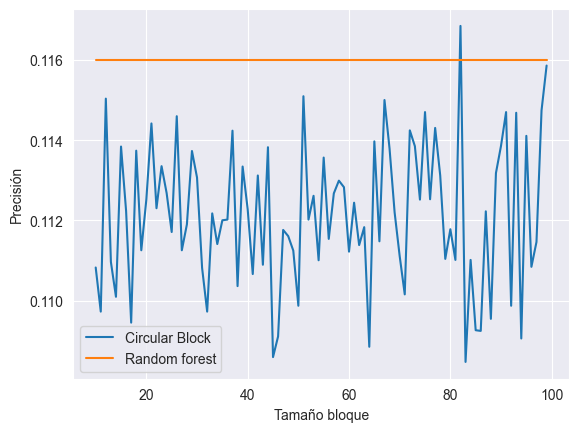

In [29]:
plt_x = []
plt_y = []

for r in precision3:
    plt_x.append(precision3[r][0])
    plt_y.append(precision3[r][1])

plt.plot(plt_x, plt_y, label ='Circular Block')

plt_x = []
plt_y = []
for r in precision:
    plt_x.append(precision2[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.xlabel("Tamaño bloque")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [30]:
rftstpMov = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, max_depth=10, block_size=30, block_type=BLOCK_TYPES[1])
rftstpMov.fit(X_train, Y_train)

RandomForestForTimeSeriesClassifier(block_size=30, block_type='moving-block',
                                    max_depth=10, n_jobs=10)

In [31]:
y_pred = rftstpMov.predict(X_test)

In [32]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.11143760525140049


In [33]:
rftstpCir = RandomForestForTimeSeriesClassifier(n_jobs=10, n_estimators=100, max_depth=10, block_size=30, block_type=BLOCK_TYPES[2])
rftstpCir.fit(X_train, Y_train)

RandomForestForTimeSeriesClassifier(block_size=30, block_type='circular-block',
                                    max_depth=10, n_jobs=10)

In [34]:
y_pred = rftstpCir.predict(X_test)

In [35]:
print("Precisión:")
print(metrics.accuracy_score(Y_test, y_pred))

Precisión:
0.11429872495446267


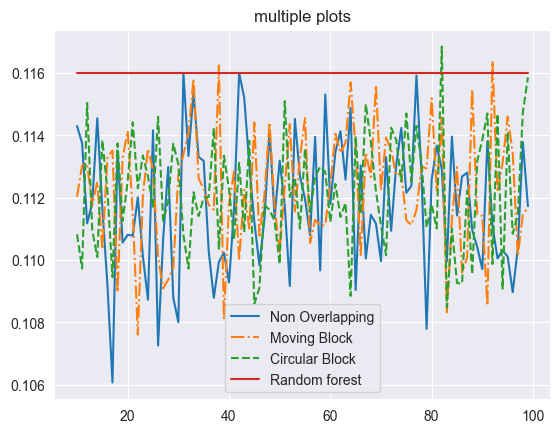

In [36]:
plt_x = []
plt_y = []

for r in precision:
    plt_x.append(precision[r][0])
    plt_y.append(precision[r][1])

plt.plot(plt_x, plt_y, label ='Non Overlapping')

plt_x = []
plt_y = []

for r in precision2:
    plt_x.append(precision2[r][0])
    plt_y.append(precision2[r][1])

plt.plot(plt_x, plt_y, '-.', label ='Moving Block')

plt_x = []
plt_y = []

for r in precision3:
    plt_x.append(precision3[r][0])
    plt_y.append(precision3[r][1])

plt.plot(plt_x, plt_y, '--', label ='Circular Block')


plt_x = []
plt_y = []

for r in precision3:
    plt_x.append(precision3[r][0])
    plt_y.append(rf_precision)

plt.plot(plt_x, plt_y, '-', label ='Random forest')

plt.legend()
plt.title('multiple plots')
plt.show()

([<matplotlib.axis.XTick at 0x24c5fcd1390>,
 [Text(0, 0, 'Non Overlapping'),
  Text(1, 0, 'Moving Block'),
  Text(2, 0, 'Circular Block')])

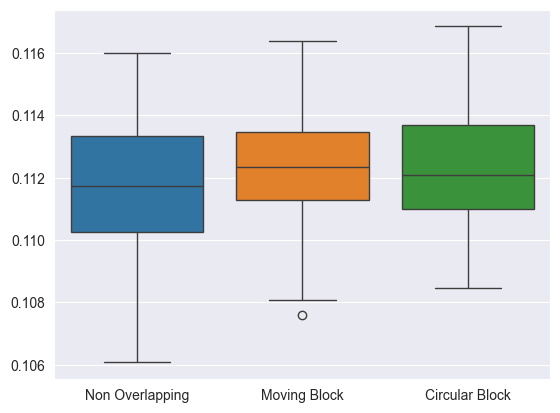

In [37]:
data1 = []
for r in precision:
    data1.append(precision[r][1])
data2 = []
for r in precision2:
    data2.append(precision2[r][1])
data3 = []
for r in precision3:
    data3.append(precision3[r][1])

all_arr = [data1,
           data2,
           data3]
sns.boxplot(data=all_arr)
plt.xticks([0, 1, 2], ["Non Overlapping", "Moving Block", "Circular Block"])